In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored
import argparse
import __init__ as my
import importlib
import os

plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (16, 9),
          'axes.grid': False,
          'grid.linestyle': '-',
          'grid.alpha': 0.2,
          'lines.markersize': 5.0,
          'xtick.minor.visible': True,
          'xtick.direction': 'in',
          'xtick.major.size': 10.0,
          'xtick.minor.size': 5.0,
          'xtick.top': True,
          'ytick.minor.visible': True,
          'ytick.direction': 'in',
          'ytick.major.size': 10.0,
          'ytick.minor.size': 5.0,
          'ytick.right': True,
          'errorbar.capsize': 0.0,
          'figure.max_open_warning': 50,
})

import yaml

In [ ]:
wf, df = {}, {}

In [70]:
crystal = 'BSO'
beam = 'mu'

In [71]:
fig_path = f'validation/{crystal}/{beam}'
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
    print(f"Cartella '{fig_path}' creata.")
else:
    print(f"Cartella '{fig_path}' esiste già.")

Cartella 'validation/BSO/mu' esiste già.


In [72]:
with open('data.yaml', 'r') as file:
    runs_info = yaml.safe_load(file)
print(runs_info)

{'BSO': {'e': {0: 278, 20: 277, 40: 276, 50: 275, 60: 274, 70: 273, 80: 272, 90: 271, 100: 270, 110: 269, 120: 268, 130: 267, 140: 266, 160: 265, 180: 264}, 'mu': {0: 246, 20: 247, 40: 248, 50: 249, 60: 250, 70: 251, 80: 252, 90: 253, 100: 254, 110: 255, 120: 256, 130: 257, 140: 258, 160: 259, 180: 261}}}


In [79]:
angle = 90
run_number = runs_info[crystal][beam][angle]

In [80]:
print(f'Reading Run {run_number} - Angle {angle}')
wf[angle], df[angle] = my.read_waveform(run_number)

Reading Run 253 - Angle 90


100%|███████████████████████████████████████████████████████████████████████████| 10028/10028 [00:08<00:00, 1156.34it/s]


In [75]:
df[angle]

,__event__,amplitude_channel1,amplitude_media_channel1,amplitude_channel2,amplitude_media_channel2,amplitude_channel3,amplitude_media_channel3,amplitude_channel4,amplitude_media_channel4,amplitude_channel5,amplitude_media_channel5,amplitude_channel6,amplitude_media_channel6
0,0,6.824748,5.516764,11.787313,9.113210,13.094076,2.888997,559.187834,1.581828,2575.581868,47.693888,840.209961,12.939453
1,1,5.924682,3.602753,18.710734,15.153300,13.419597,1.045736,589.408375,4.134115,2415.466309,40.374756,860.738118,7.792155
2,2,7.417806,6.445821,8.596598,4.616343,11.417643,3.365072,632.625335,2.649943,2124.613444,29.973348,839.009603,13.529460
3,3,7.282104,5.400085,9.601440,7.129059,11.083985,1.959229,174.568687,2.146403,2398.010254,36.727905,836.324056,14.506022
4,4,6.149088,5.239665,11.356811,7.399902,11.157227,3.662109,404.060878,1.890055,2395.446777,39.230347,839.599609,13.916016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044,10044,5.833740,4.302368,15.665079,10.580698,12.467448,4.600016,589.156096,2.619425,2279.927572,33.762614,841.898600,12.959798
10045,10045,6.786702,6.016133,12.825063,10.128835,12.963867,3.808594,512.471525,4.899089,2308.939616,33.894857,847.839355,10.864258
10046,10046,6.982625,5.756887,17.669372,15.009002,12.565104,1.003011,415.006517,1.552327,2479.288737,41.386922,867.492676,14.099121
10047,10047,2.012939,0.456696,8.959300,5.071208,10.034180,3.076172,61.979168,1.320394,1868.937174,30.644735,846.211751,13.407389


In [76]:
times = wf[angle][0]['times']

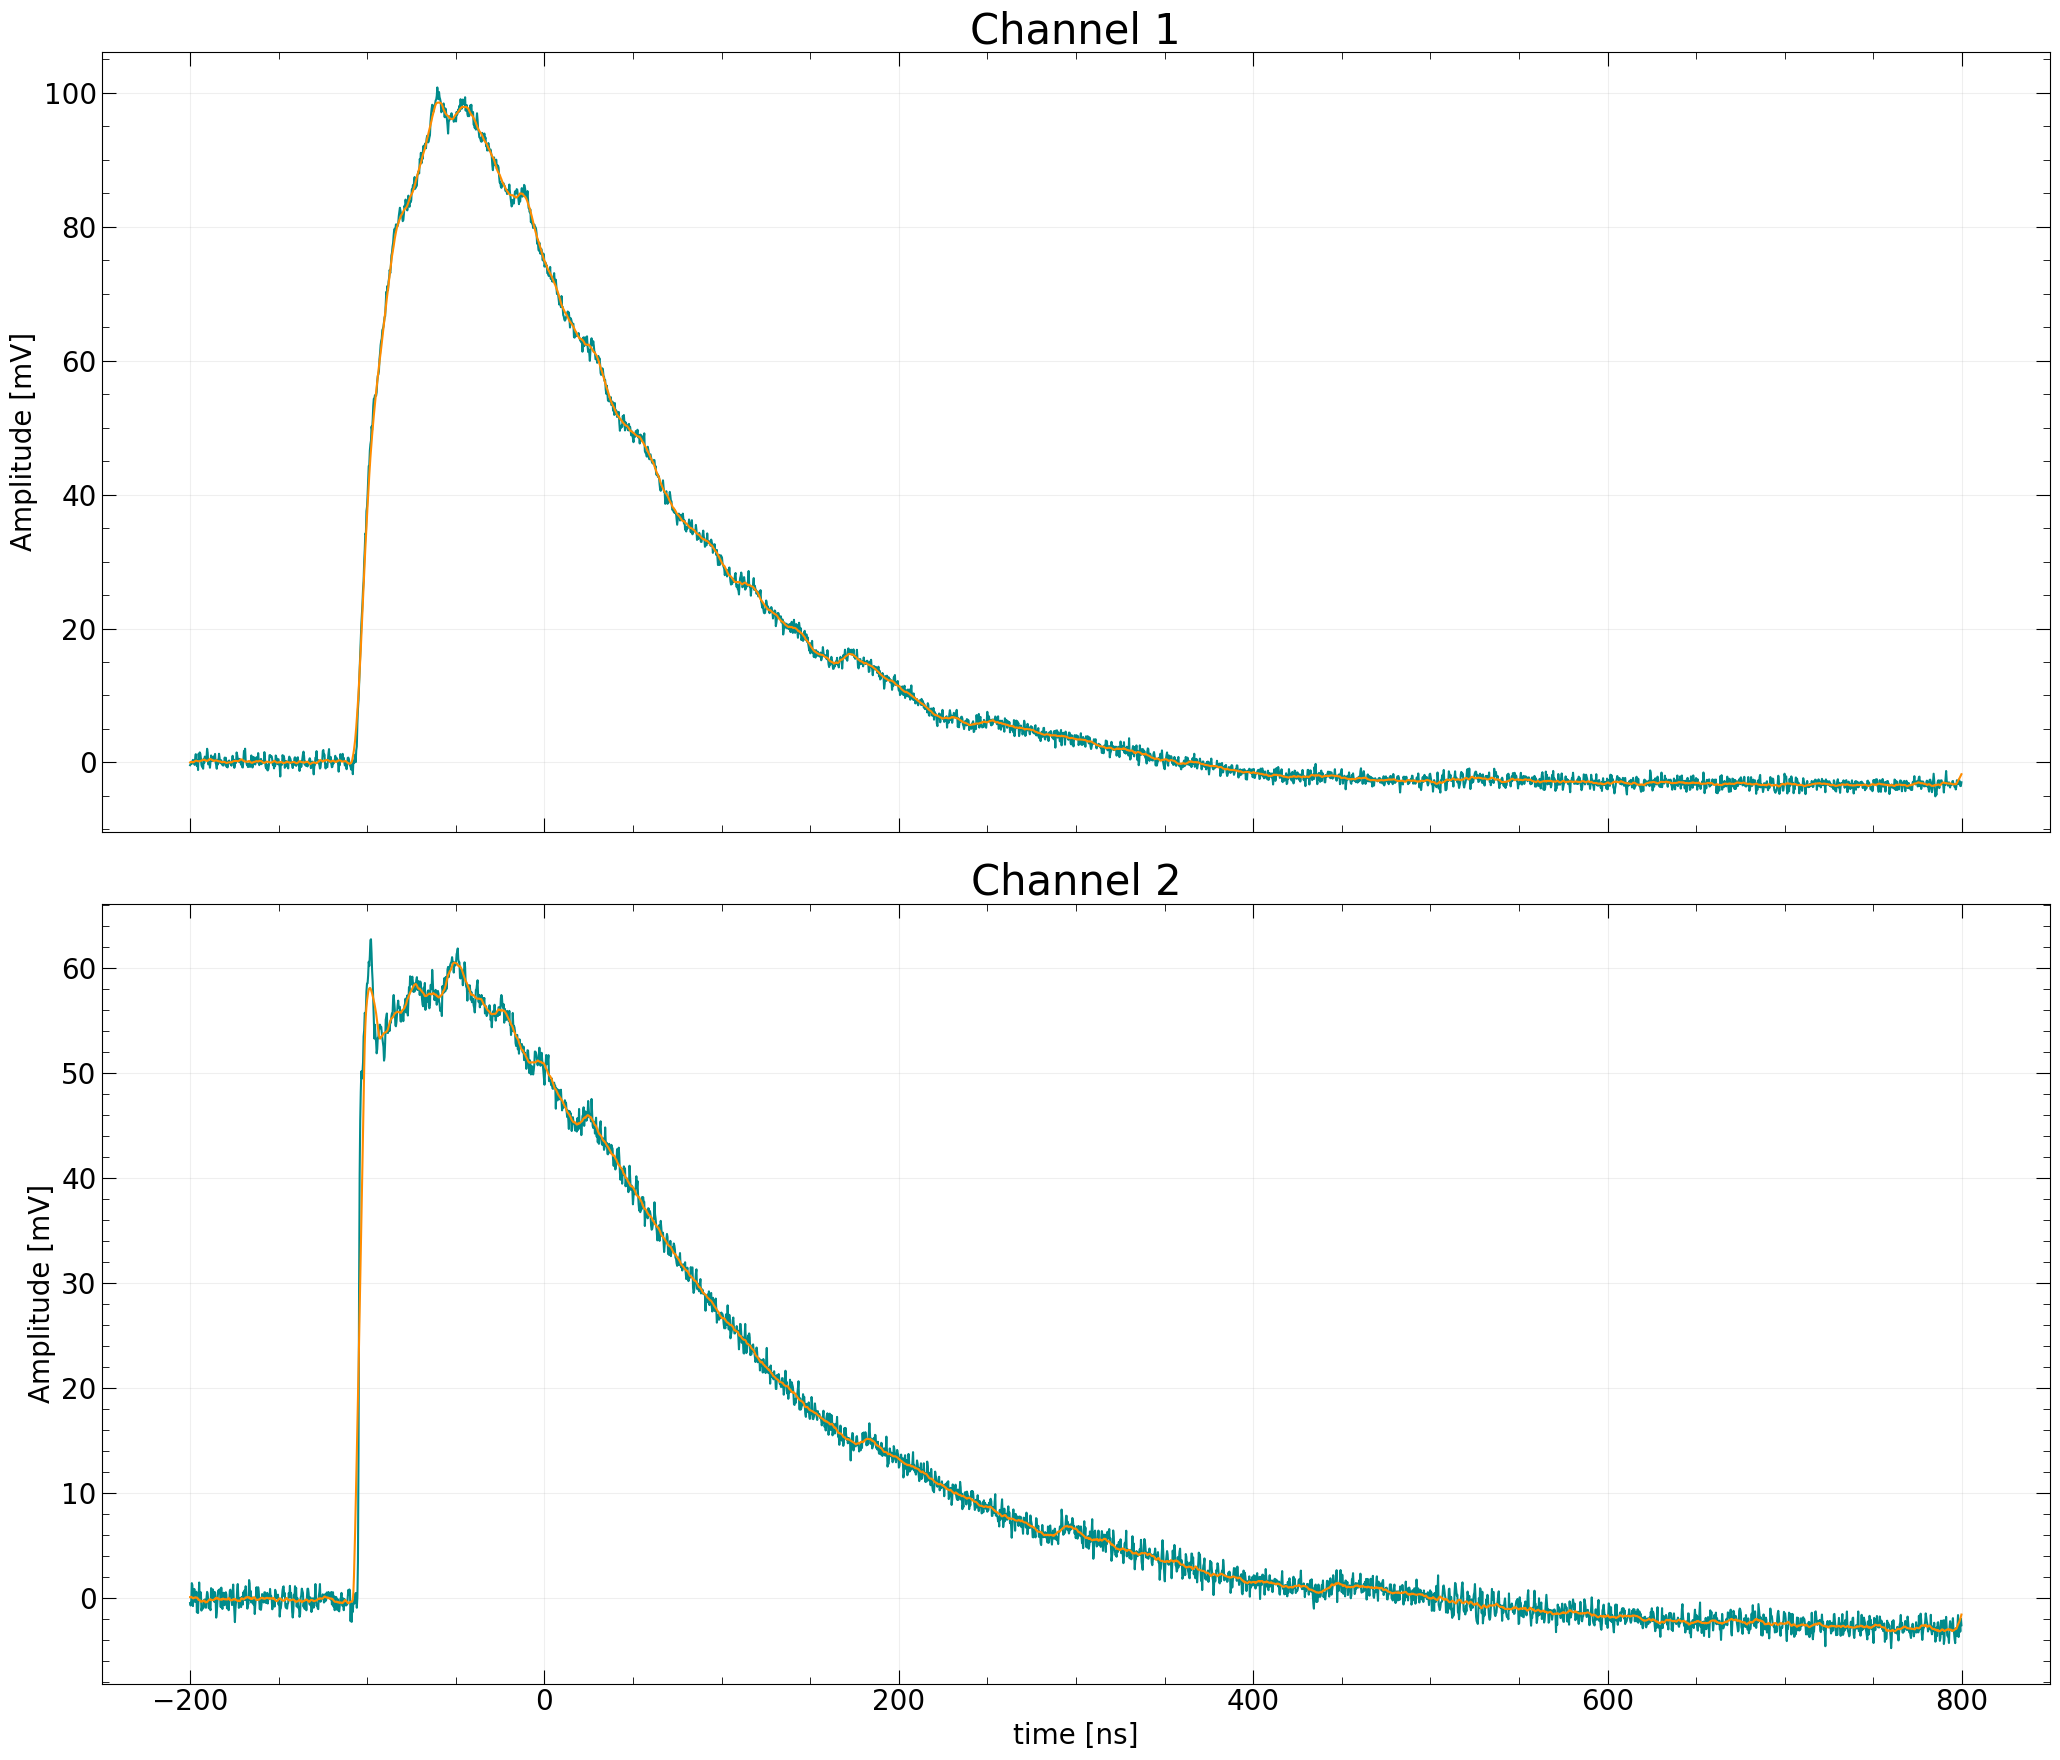

In [66]:
fig, ax = plt.subplots(len(channels), 1, sharex = True, figsize = (21, 9*len(channels)))
for i, channel in enumerate(channels):
    event_id = 20716
    ax[i].plot(times, wf[angle][event_id][channel], label='Dati', color='darkcyan', linestyle='-')
    ax[i].plot(times, wf[angle][event_id][f'{channel}media'], label='Dati', color='darkorange', linestyle='-')
    ax[i].set_ylabel('Amplitude [mV]', fontsize = 20)
    ax[i].set_title(f'Channel {channel}', fontsize = 30)
    ax[i].grid(True)
plt.xlabel('time [ns]', fontsize = 20)
plt.tight_layout()
plt.savefig(f'{fig_path}/waveforms_event{event_id}_run{run_number}_angle{angle}_high.png' ,dpi = 300)

In [77]:
channels = [1, 2]

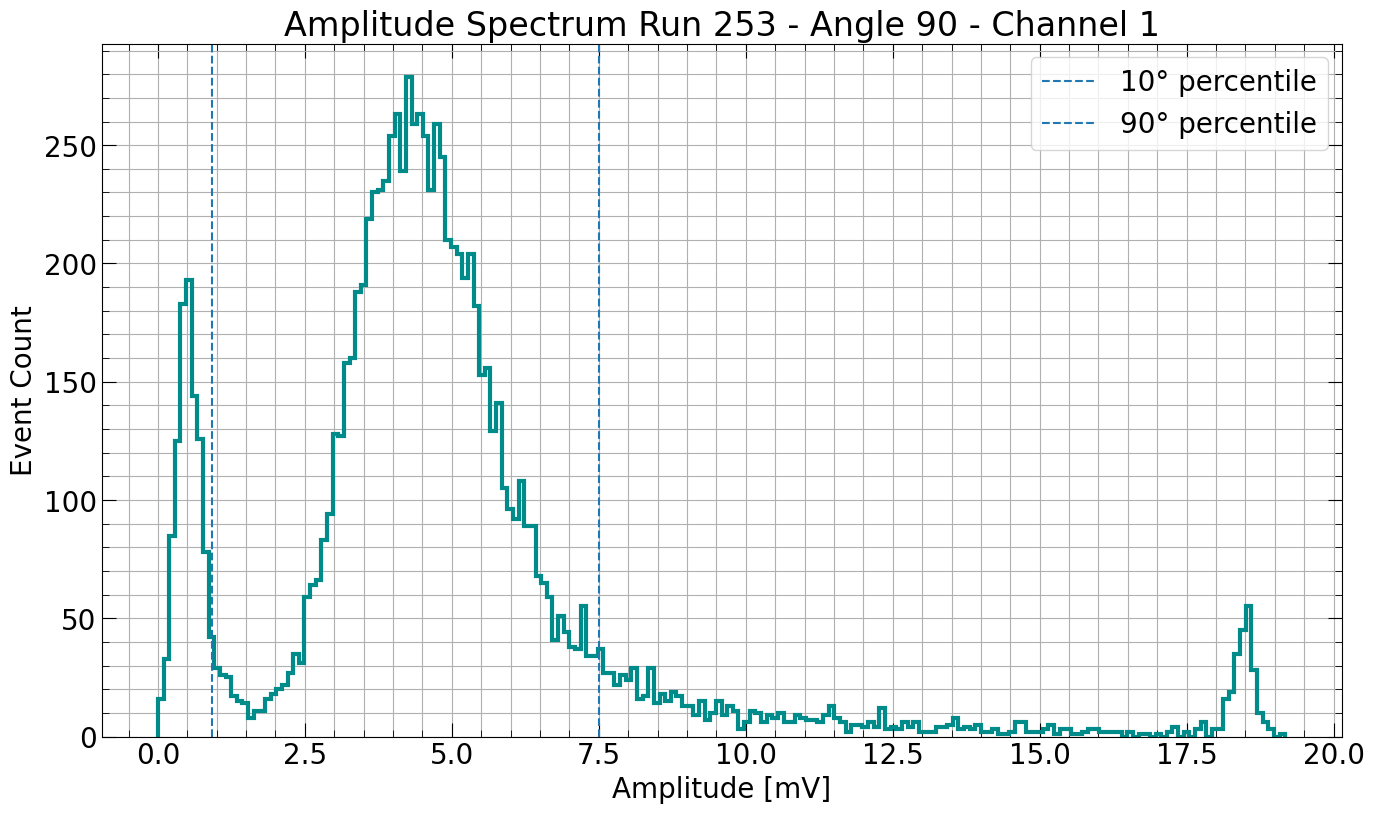

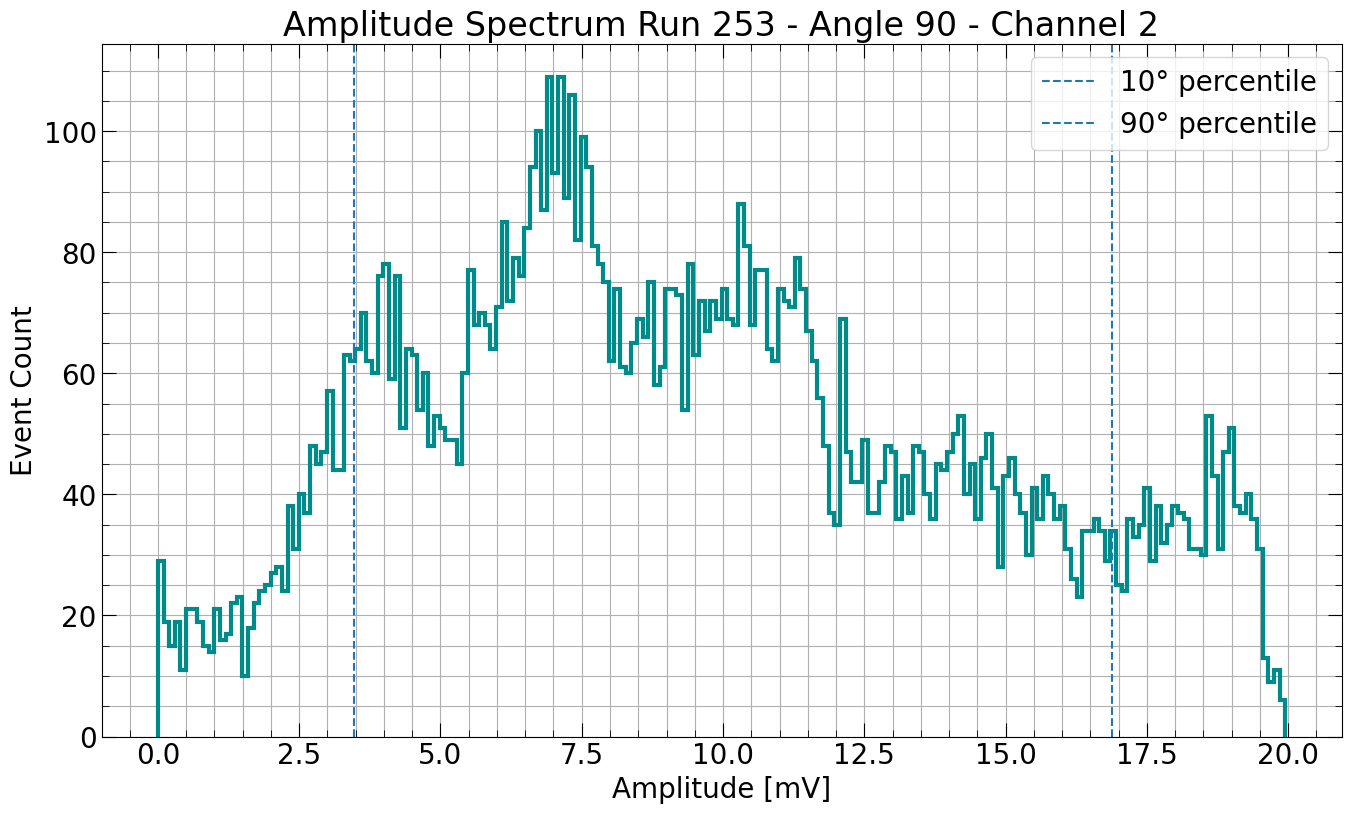

In [83]:
hist = {}
percentile = {}
percs = [10, 90]
percentile = {perc: {} for perc in percs}
for channel in channels:
    plt.figure()
    data = df[angle][f'amplitude_media_channel{channel}']
    hist[channel], bin_edges, __ = plt.hist(data, bins = 200, histtype = 'step', linewidth = 3, color = 'darkcyan')
    for perc in percs:
        percentile[perc][channel] = np.percentile(data, perc)
        plt.axvline(percentile[perc][channel], linestyle='--', label=f'{perc}° percentile')

    plt.grid(alpha = 1, which = 'both')
    plt.yscale('linear')
    plt.title(f'Amplitude Spectrum Run {run_number} - Angle {angle} - Channel {channel}')
    plt.xlabel('Amplitude [mV]')
    plt.ylabel('Event Count')
    plt.legend(loc = 'upper right')
    plt.tight_layout
    plt.savefig(f'{fig_path}/AmplitudeSpectrum_Angle{angle}_Channel{channel}.png', dpi = 300)

2072
18439
2071
18439


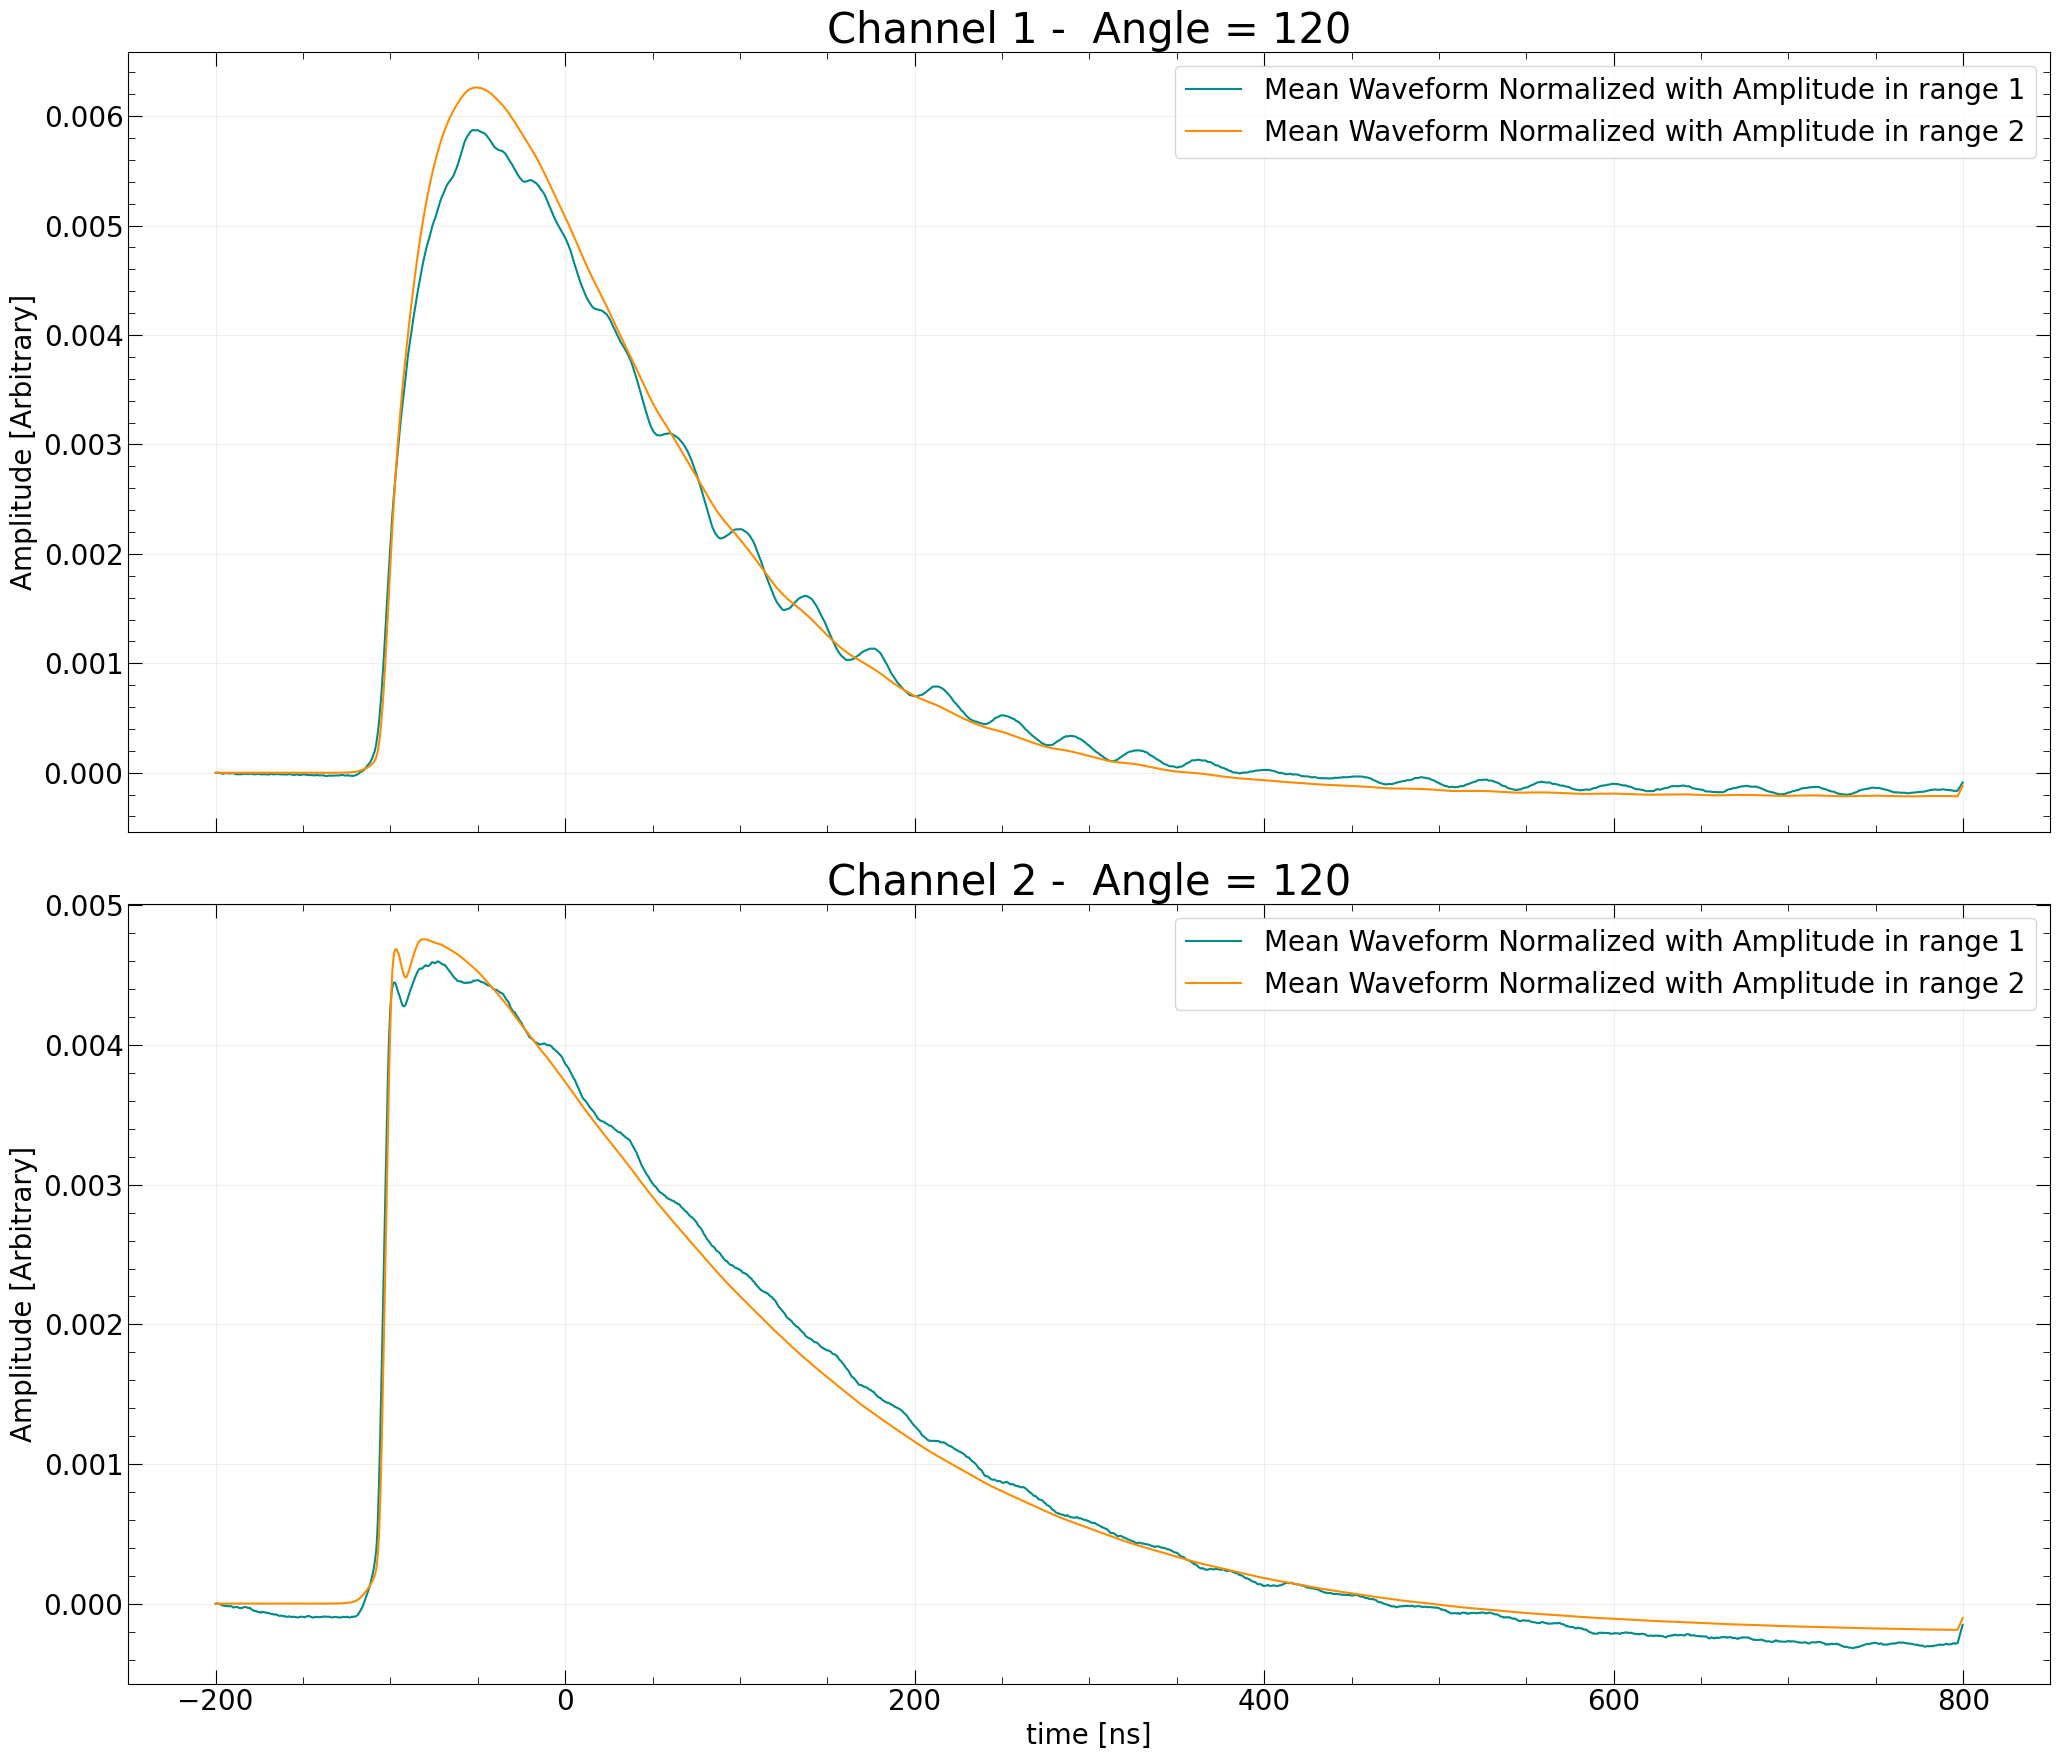

In [69]:
mean = {}
importlib.reload(my)
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (21, 18))

for i, channel in enumerate(channels):
    for j, perc in enumerate(percs):
        m = 0 if j == 0 else percentile[percs[0]][channel]
        M = percentile[perc][channel]
        mean[angle] = my.sum_waveform(wf[angle], channel, maximum = True, ampl_max = M, ampl_min = m)
        color__ = 'darkcyan' if j == 0 else 'darkorange'
        normalize = True
        area = np.trapz(mean[angle], times) if normalize else 1
        Normalized = 'Normalized ' if normalize else '' 
        mv = 'Arbitrary' if normalize else 'mV'
        mean_normalized = mean[angle] / area
        ax[i].plot(times, mean_normalized, label=f'Mean Waveform {Normalized}with Amplitude in range {j+1}', color=color__, linestyle='-')
    ax[i].set_ylabel(f'Amplitude [{mv}]', fontsize = 20)
    ax[i].set_title(f'Channel {channel} -  Angle = {angle}', fontsize = 30)
    ax[i].grid(True)
    ax[i].legend()
plt.xlabel('time [ns]', fontsize = 20)
plt.tight_layout()
plt.savefig(f'{fig_path}/MeanWaveform_Angle{angle}.png', dpi = 300)